# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

To analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Perform the data analysis to find answers to key questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
import os
import math

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

#### Loading MyDrive

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Loading Data Drive

In [ ]:

# Uncomment in google drive 
CURRENT_DIRECTORY = os.getcwd()
!pwd
PROJECT_DIR = 'FoodHubProject'
DATA_DIR = 'data'
WORKING_DIR = os.path.join(CURRENT_DIRECTORY, 'drive', 'MyDrive', 'Colab Notebooks', PROJECT_DIR, DATA_DIR)
data_file = os.path.join(WORKING_DIR, 'foodhub_order.csv')
print(data_file)


/content
/content/drive/MyDrive/Colab Notebooks/FoodHubProject/data/foodhub_order.csv


In [ ]:
'''
# uncomment for local system
DATA_DIR = 'data'
data_file = os.path.join(DATA_DIR, 'foodhub_order.csv')
print(data_file)
'''


"\n# uncomment for local system\nDATA_DIR = 'data'\ndata_file = os.path.join(DATA_DIR, 'foodhub_order.csv')\nprint(data_file)\n"

#### Looking at first 5 rows of the dataset

In [ ]:
# read the data
df = pd.read_csv(data_file)
# preserving the original dataset
df_orig = df
# returns the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

* The Dataset has 9 columns as mentioned in the Data Dictionary. 
* Data in each row corresponds to the order placed by a customer.
* There appears to be some missing ratings in the ratings column
* The dataset contains both numerical and textual data.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
rows, cols = df.shape
print(f'Number of rows in the data frame: {rows}')
print(f'Number of columns in the data frame: {cols}')

Number of rows in the data frame: 1898
Number of columns in the data frame: 9


#### Observations:
 The dataset has 
*  1898 rows
*   9 columns



### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
# Use info() to print a concise summary of the DataFrame
# print('The Datatypes of all the columns in the dataset are as follows:\n', df.dtypes, '\n')
print('The Datatypes of all the columns in the dataset are as follows:\n',df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
The Datatypes of all the columns in the dataset are as follows:
 None


#### Observations:
* We can see that the dataset has **5 numerical variables** and the other **4 variables are of type object**.
* The `rating` column contains numbers and string like  `Not Given` to indicate no rating was given. If there is no option of giving 0 rating we could convert all `Not Given` to 0's. Hence, this column could either be converted to numerical or categorical, which can be decided after further inspection.
* The `day_of_the_week` column can be converted to categorical data as it has only two types of values `Weekday` or `Weekend`
* The other object type columns conatin textual information which can be represented as categories, hence they can also be converted to the type `category`
* From the info function we can see here  that there are no missing values in the dataset as every column has 1898 values but in order to confirm this we need to analyse the data further as we can see some values in the rating column being represented as `Not Given` which could be considered as missing value.

### **Question 3:** Are there any missing values in the data?

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* As we can see there are no missing values in the dataset.
* We need to check the rating coulumn in detail to understand how many 'Not Given` values are present as they could be categorized as missing data.





### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
Food Preperation times:
* The **minimum time** to prepare the food is **20 minutes**
* The **average time** to prepare the food is **27.37 minutes**
* The **maximum time** to prepare the food is **35 minutes**

In [ ]:
# Total number of customers
n = len(pd.unique(df['customer_id']))
print("No.of.unique customers :", n)

n2 = len(pd.unique(df['order_id']))
print("No.of.unique orders :", n2)

print(f'Average orders per customer: {(n2/n):.2f}')

No.of.unique customers : 1200
No.of.unique orders : 1898
Average orders per customer: 1.58


Other Observations:
* The number of **unique customers are 1200**, hence the data set contains multiple orders from the same customers.
* All the **order_ids are unique**, and can be considered as a unique identifier, it might not lend much information for analysis; but will be useful in record keeping in case we want to trace back to an order if we find something interesting in the EDA.
* The **average orders per customer are ~2**, which indicates that customers are reordering from the app
* There are **219 unique reataurants** hence we can make this into a categorical column
* And **14 different cuisines**, so this column can also be of type category

### **Question 5:** How many orders are not rated?

In [ ]:
# Counting how many instances of each type of rating are present in the dataset
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* **736 orders** are **not rated**
* As you can see the rating column has **736 instance with the value `Not Given`**.
* And since there is no category as 0 rating we can ***convert the `Not Given` rating to 0 and make this column into a `int` rather than type `category`***; as the former will later help us perform any numerical calculations on this column

#### Changinging datatype of columns:
* `day_of_the_week` from **object** to **category**
* `restaurant_name` from **object** to **category**
* `cuisine_type` from **object** to **category**
* `rating` from **object** to **int**

In [ ]:
# Changing datatypes:

# Column `day_of_the_week`: from type object to type category
df['day_of_the_week'] = df['day_of_the_week'].astype('category')


# Column 'restaurant_name' : from object to 'category'
df['restaurant_name'] = df['restaurant_name'].astype('category')

# Column 'cuisine': from object to 'category'
df['cuisine_type'] = df['cuisine_type'].astype('category')

# Column `rating`: first replacing `Not Given` to 0 and then converting the data type interger
print('\nrating column data distribution before replacement:\n', df['rating'].value_counts())
# Replacing 'Not given' with 0
df['rating'].replace('Not given', 0, inplace=True)
df['rating'] = df['rating'].astype(int)

# Checking replacement & data type of rating column
print('\nrating column data distribution after replacement:\n', df['rating'].value_counts())
print('\nChanged datatype of the columns: \n', df.dtypes[['day_of_the_week', 'restaurant_name', 'cuisine_type', 'rating']])




rating column data distribution before replacement:
 Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

rating column data distribution after replacement:
 0    736
5    588
4    386
3    188
Name: rating, dtype: int64

Changed datatype of the columns: 
 day_of_the_week    category
restaurant_name    category
cuisine_type       category
rating                int64
dtype: object


In [ ]:
# Names of the columns in the dataset
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. Histograms, boxplots, countplots, etc. are used for univariate exploration.

#### **order_id** Column:

In [ ]:
print(f'Total unique order_ids in the datset: {len(df.order_id.unique())}')

Total unique order_ids in the datset: 1898


#### Observations:
* The number of unique values in this column is equal to the total instances in the dataset, hence there is not much to explore here.

#### **customer_id** column:

In [ ]:
# Looking at the distribution of the customer_id column, number of orders per customer
plt.figure(figsize=(300,80))
sns.countplot(data=df, x='customer_id')
plt.show()

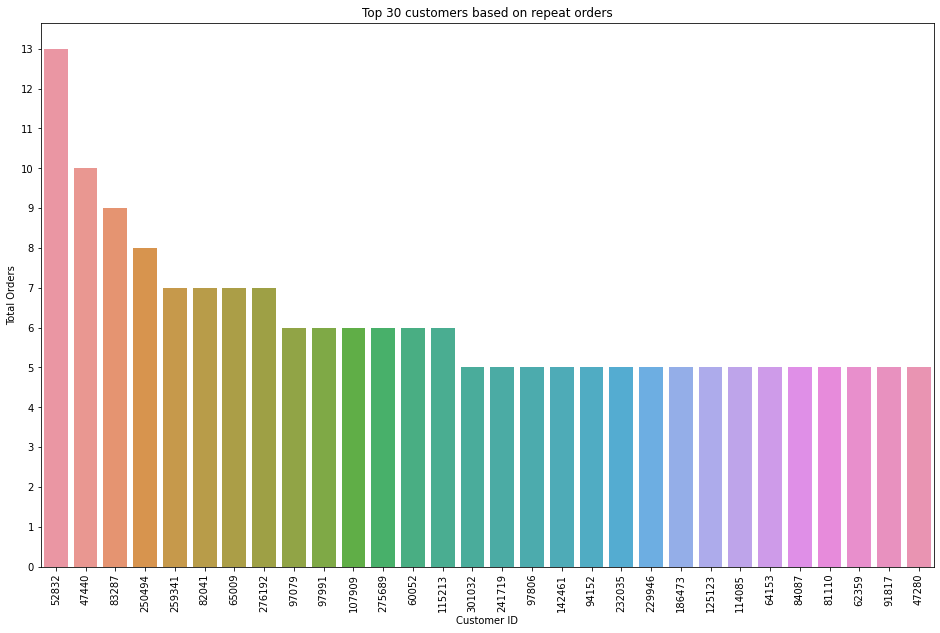

In [ ]:
# top 30 customer_id based on number of orders:
plt.subplots(figsize=(16,10))
plt.yticks(np.arange(0, 14, 1))
ax = sns.countplot(data=df, x='customer_id', order=df['customer_id'].value_counts()[:30].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 
ax.set_title('Top 30 customers based on repeat orders')
ax.set_xlabel('Customer ID')   
ax.set_ylabel('Total Orders')    
plt.show()

In [ ]:
# Counting how many customers placed varying total orders
df_count_of_total_orders = df.customer_id.value_counts().to_frame('total_orders').value_counts().reset_index()
df_count_of_total_orders.columns= ['total_orders', 'count']
df_count_of_total_orders

,total_orders,count
0,1,784
1,2,267
2,3,83
3,4,33
4,5,19
5,6,6
6,7,4
7,8,1
8,9,1
9,10,1


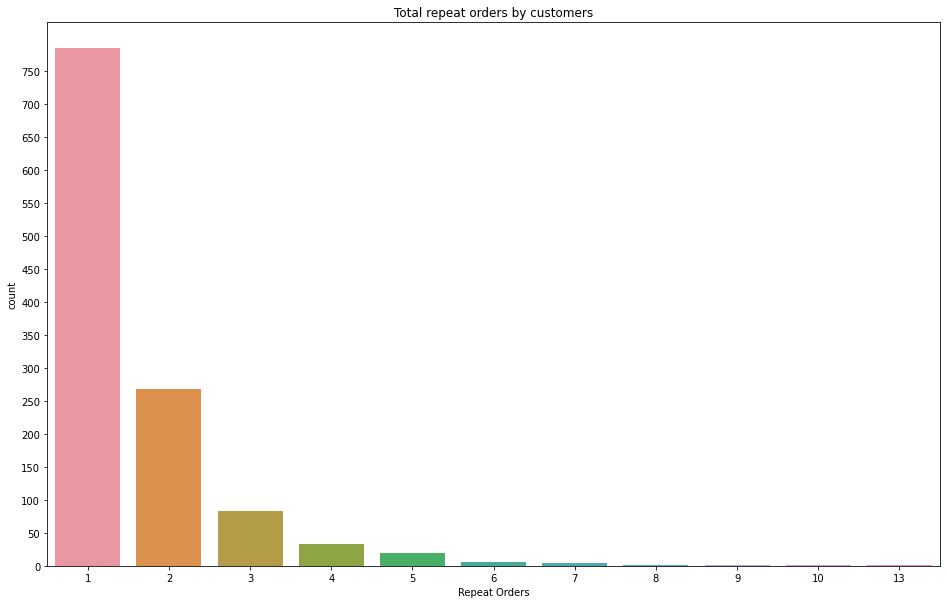

In [ ]:
plt.subplots(figsize=(16,10))
plt.yticks(np.arange(0, 800, 50.0))
ax = sns.barplot(data=df_count_of_total_orders, x='total_orders', y='count')
ax.set_title('Total repeat orders by customers')
ax.set_xlabel('Repeat Orders')
plt.show()

#### Observations:
 
* This data is **heavily right-skewed**
* As we can see that some repeat customers have made a maximum of 13 orders, while many have placed just 1 order
* About 784 cutomers have placed only 1 order each and 
* 13, 10, 9 and 8 repeat orders were placed by one customer each.
* The next popular repeat order is 2 and about 267 customers have placed 2 orders using the app.



#### **day_of_the_week** Column:

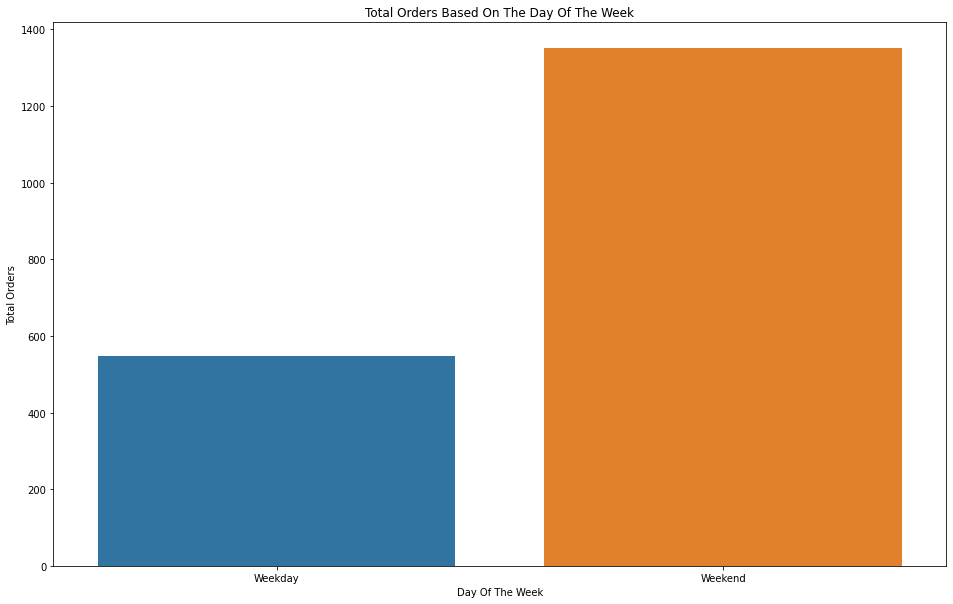

In [ ]:
# 'day_of_the_week':
plt.subplots(figsize=(16,10))
ax = sns.countplot(data=df, x='day_of_the_week')  
ax.set_title('Total Orders Based On The Day Of The Week')
ax.set_xlabel('Day Of The Week')   
ax.set_ylabel('Total Orders')     
plt.show()



#### Observations:
* Over **2/3<sup>rds</sup> of the orders** are on **Weekends** i.e. customers prefer to order on weekends
* It will be intereseting to see the correlation of this feature with other features like 
  * `customer_id`: to check if certain customers repeat order on weekends,
  * `delivery time`: how does this differ for the different days of the week, and 
  * `cost of the orders`: are orders placed on weekends higher, etc. 
  * `food preparation time`: to check food preparation time on weekdays vs weekends to understand if resourcing needs to be looked at when preparation time is excessive compared to the average

#### **cost_of_order, rating, food_preperation_time, delivery_time** Column:

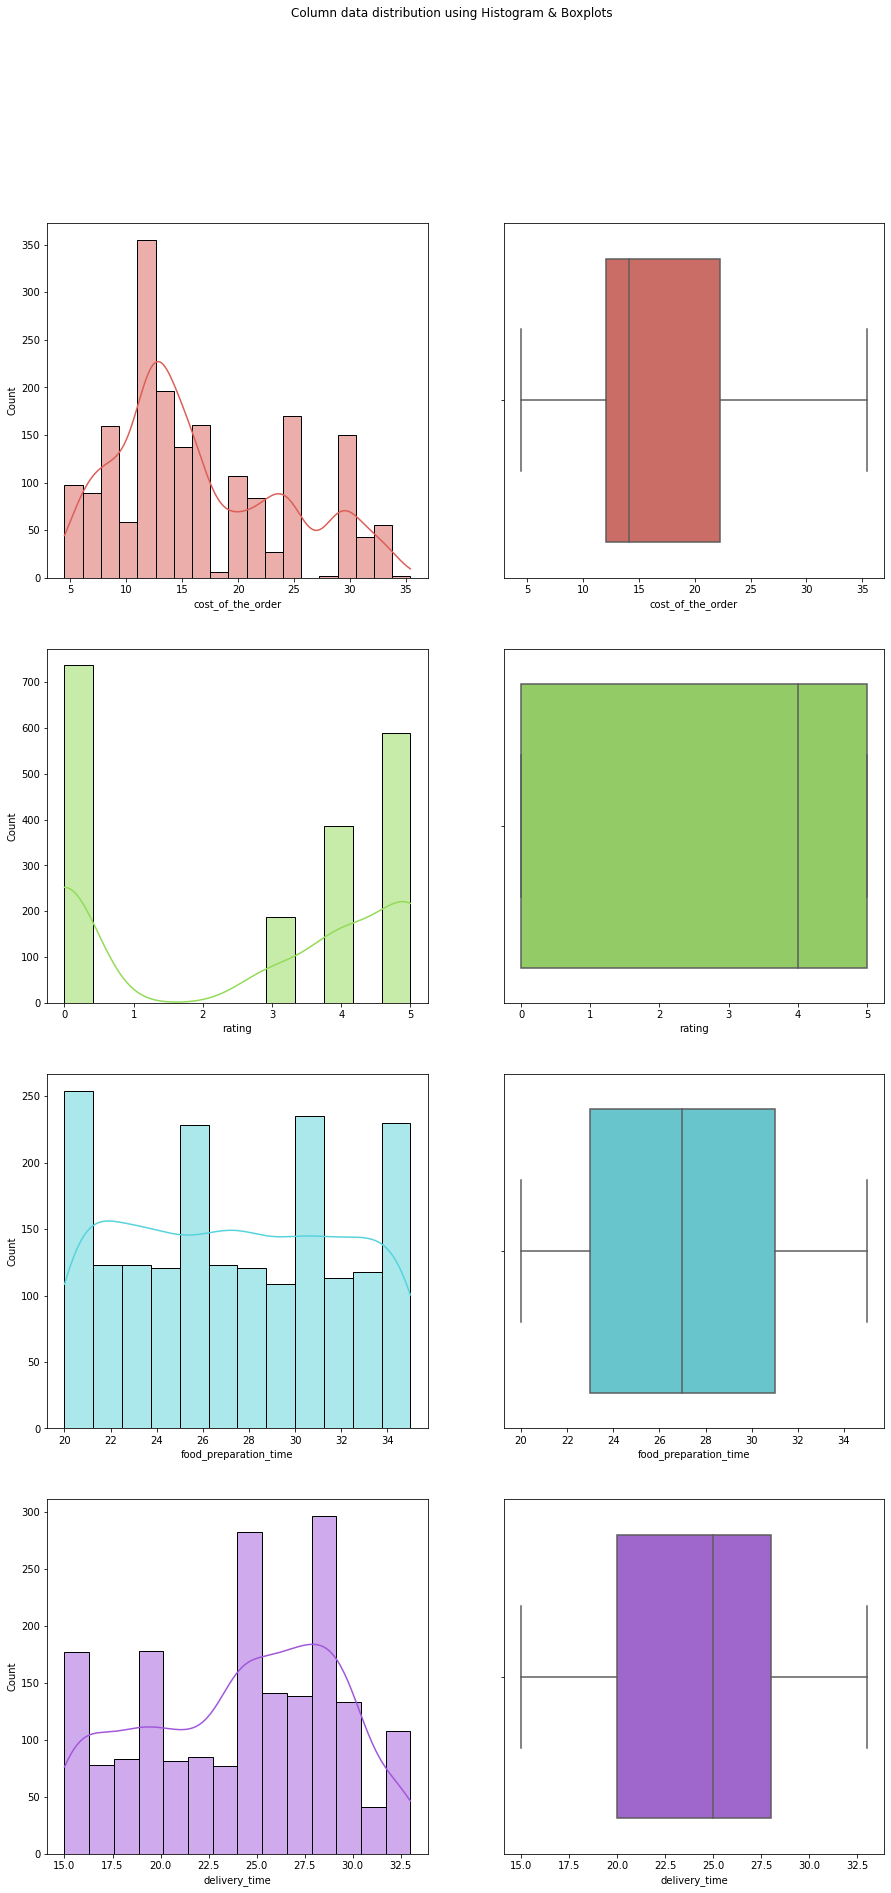

In [ ]:
# Columns to explore
eda_cols = ['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']
counter = -1
plot_cols = 2 
plot_rows = len(eda_cols)
eda_colors = sns.color_palette("hls", plot_rows)


fig, axs = plt.subplots(plot_rows, plot_cols, figsize=(15,30))
fig.suptitle('Column data distribution using Histogram & Boxplots')
# axs.set_title(r'$d_n$')
# axs.set_xlabel(r'max($F_{a,max}$)')
# axs.set_ylabel(r'$\tau_{ken}$')


# Plotting Histograms
for i in range(0, plot_rows):
    counter +=1
    for j in range(0,plot_cols):
        if j == 0:
            sns.histplot(data = df, x = eda_cols[counter], kde=True, color=eda_colors[counter], ax=axs[i, j])
        elif j == 1:
            sns.boxplot(data = df, x = eda_cols[counter], color=eda_colors[counter], ax=axs[i, j])
        # axs[i, j].set_xlabel(plot_xaxis[counter])
        

plt.show()

#### Observations:
* `cost_of_the_order`: 
  * The data for this feature is **right skewed**.
  * The range of cost for orders is between \$5 to \$35.
  * Maximum orders are under \$25 and fewer orders in the range of \$25 to \$35
  * 25\% of the orders are between \$12 to \$14; thus being the most popular range and the average price of an order is ~ $15.3 
  * There are no ourliers here 
* `rating`:
  * Over 700 of the ratings were missing and the data is not evenly distributed as there are no 1 or 2 ratings
  * The 4 and 5 are the most popular ratings as 50% of the orders are rated 4 & 5; which indicates customers are very happy with their order
  * Missing rating could be assumed to be from customers who either did not like the food or found it to be below average, hence did not bother leaving a rating.
* `food_preparation_time`:
  * The food prep time is evenly distributed between the range of 20 to 35 mins and the average food prep time is ~27 mins.
  * 75% of the orders are prepared under 31 mins which could have a correlation with the cost of orders where about 75% of the orders were under the \$23 range. 
  * Since there are no bigger orders (based on cost) the maximum prep time orders also make up only 25% of the orders.
* `delivery_time`:
  * The distribution is **slightly left skewed**
  * Over 75% of the orders take more than 20 mins to deliver and the average delivery time is ~25 mins
  * Fewer orders take more than 30 mins to deliver, it would be interesting to see which day these orders are delivered on and if there is a pattern there
  * There are no outliers here


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

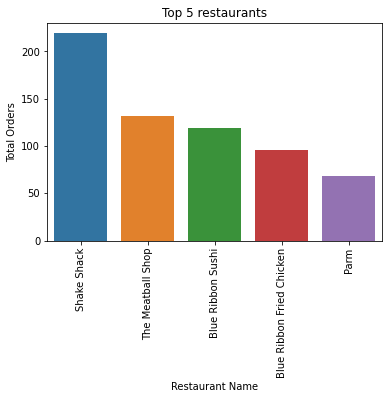



Top 5 restaurants:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


In [ ]:
# reaturant_name:
ax = sns.countplot(data=df, x='restaurant_name', order=df['restaurant_name'].value_counts(ascending=False)[:5].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Top 5 restaurants')
ax.set_xlabel('Restaurant Name')
ax.set_ylabel('Total Orders')
plt.show()
print(f"\n\nTop 5 restaurants:\n{df['restaurant_name'].value_counts(ascending=False)[0:5]}")

#### Observations:
* The top 5 restaurants with the maximum orders are shown above
* Two of the restaurants (number 2 and 3) have almost similar number of orders


### **Question 8**: Which is the most popular cuisine on weekends?

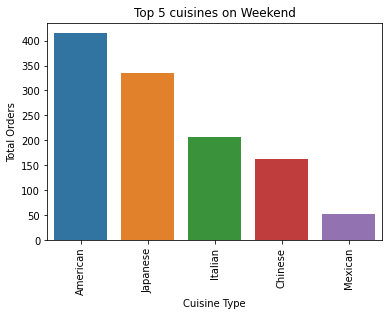

In [ ]:
weekend_cuisine = df.loc[df['day_of_the_week'] == 'Weekend']
ax = sns.countplot(data=weekend_cuisine, x='cuisine_type', order=weekend_cuisine['cuisine_type'].value_counts()[:5].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Top 5 cuisines on Weekend')
ax.set_xlabel('Cuisine Type')
ax.set_ylabel('Total Orders')
plt.show()

#### Observations:
* Over 400 orders on weekend were for the **American** cuisine
* The most popular cuisine on the weekend is American which is also the cuisine of the 1st and the 4th most popular restaurant `Shake Shack`& `Blue Ribbon Fried Chicken`


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# % of orders costing more than $20
perc = (len(df.loc[df['cost_of_the_order'] > 20])/len(df))*100
print(f'Percentage of orders costing more than $20 is: {perc:.1f}%')


Percentage of orders costing more than $20 is: 29.2%


#### Observations:
* Only 30% of the orders are more than $20 which implies there is a lot of scope for marketing and enticing customers to make bigger orders

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Mean order delivery time
mean_time = df.delivery_time.mean()
print(f'Mean order delivery time is: {mean_time:.2f} mins')

Mean order delivery time is: 24.16 mins


#### Observations:
Given the traffic and logistical challenges in Newyork, the average delivery time seems very reasonable and additional efforts to improve these might provide only slightly incremental ratings.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Top 3 most frequent customers
top_3 = pd.DataFrame(df.customer_id.value_counts()[:3]).reset_index()
top_3.columns = ['customer_id', 'total_orders']
print(f"Top three most frequent customer's customer_id:\n{top_3}")

Top three most frequent customer's customer_id:
   customer_id  total_orders
0        52832            13
1        47440            10
2        83287             9


#### Observations:
As can be seen the top 3 customers with the highest number of total orders are as above which matches with the earlier visualization of the top 30 customers

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


In [ ]:
# Converting the categorical variables restaurant_name, cusine_type, day_of_the_week into numerical variables by assigning numbers to the various categories:

# day_of_the_week: converting from category to in
# 0 if 'Weekday' and 1 if 'Weekend'
df['day_of_the_week_num'] = (df['day_of_the_week'].apply(lambda x: int(0) if x == 'Weekday' else int(1))).astype(int)
df['day_of_the_week_num'].value_counts()

1    1351
0     547
Name: day_of_the_week_num, dtype: int64

In [ ]:
# resaturant_name: converting category to int
# Key to hold the restaurant name as key and a unique number as value
rests = list(pd.unique(df.restaurant_name))
key_restaurant = {k:(i+1) for i, k in enumerate(rests)}
# print(key_restaurant)

df['restaurant_name_num'] = (df['restaurant_name'].apply(lambda x: key_restaurant[x])).astype(int)
df['restaurant_name_num'].value_counts()

15     219
7      132
18     119
4       96
29      68
      ... 
132      1
136      1
138      1
141      1
178      1
Name: restaurant_name_num, Length: 178, dtype: int64

In [ ]:
# cuisine_type: converting category to int
# Key to hold the restaurant name as key and a unique number as value
cuis = list(pd.unique(df.cuisine_type))
key_cuisine ={k:(i+1) for i, k in enumerate(cuis)}
df['cuisine_type_num'] = (df['cuisine_type'].apply(lambda x: key_cuisine[x])).astype(int)
df['cuisine_type_num'].value_counts()

4     584
2     470
6     298
8     215
3      77
5      73
9      49
7      46
10     19
12     18
11     17
1      13
13     12
14      7
Name: cuisine_type_num, dtype: int64

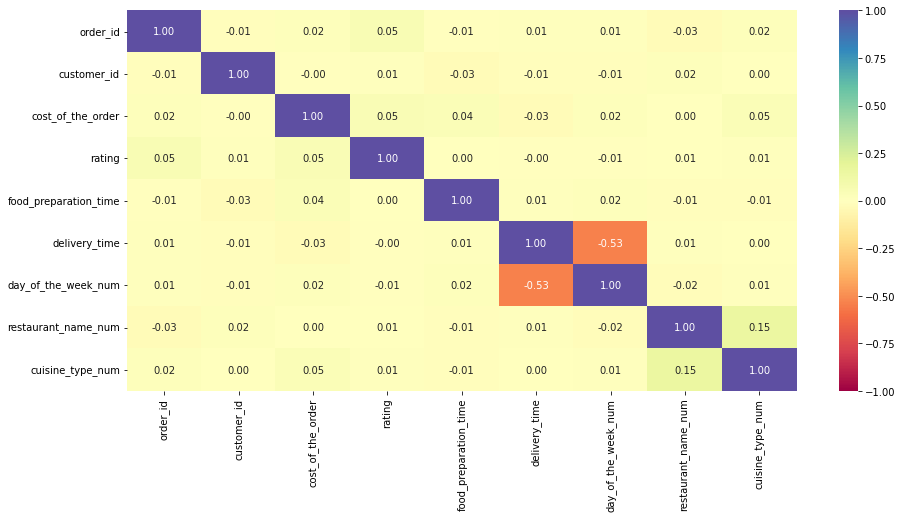

In [ ]:
# Check for correlation among numerical variables
num_var = ['order_id', 'customer_id', 'cost_of_the_order','rating', 'food_preparation_time', 'delivery_time', 'day_of_the_week_num', 'restaurant_name_num', 'cuisine_type_num']

corr = df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations:
* There is a negative correlation between the day_of_the_week and delivery_time. So the delivery time is lower when the day of the week is higher (1) which is the weekend, thus indicating that on Weekends the delivery of food is faster.This is in line with the observation made in Question 16 below.
* Also as expected there is some correlation between the restaurant_name and the cuisine type as this is a constant relationship.
* All other correlations are not very significant

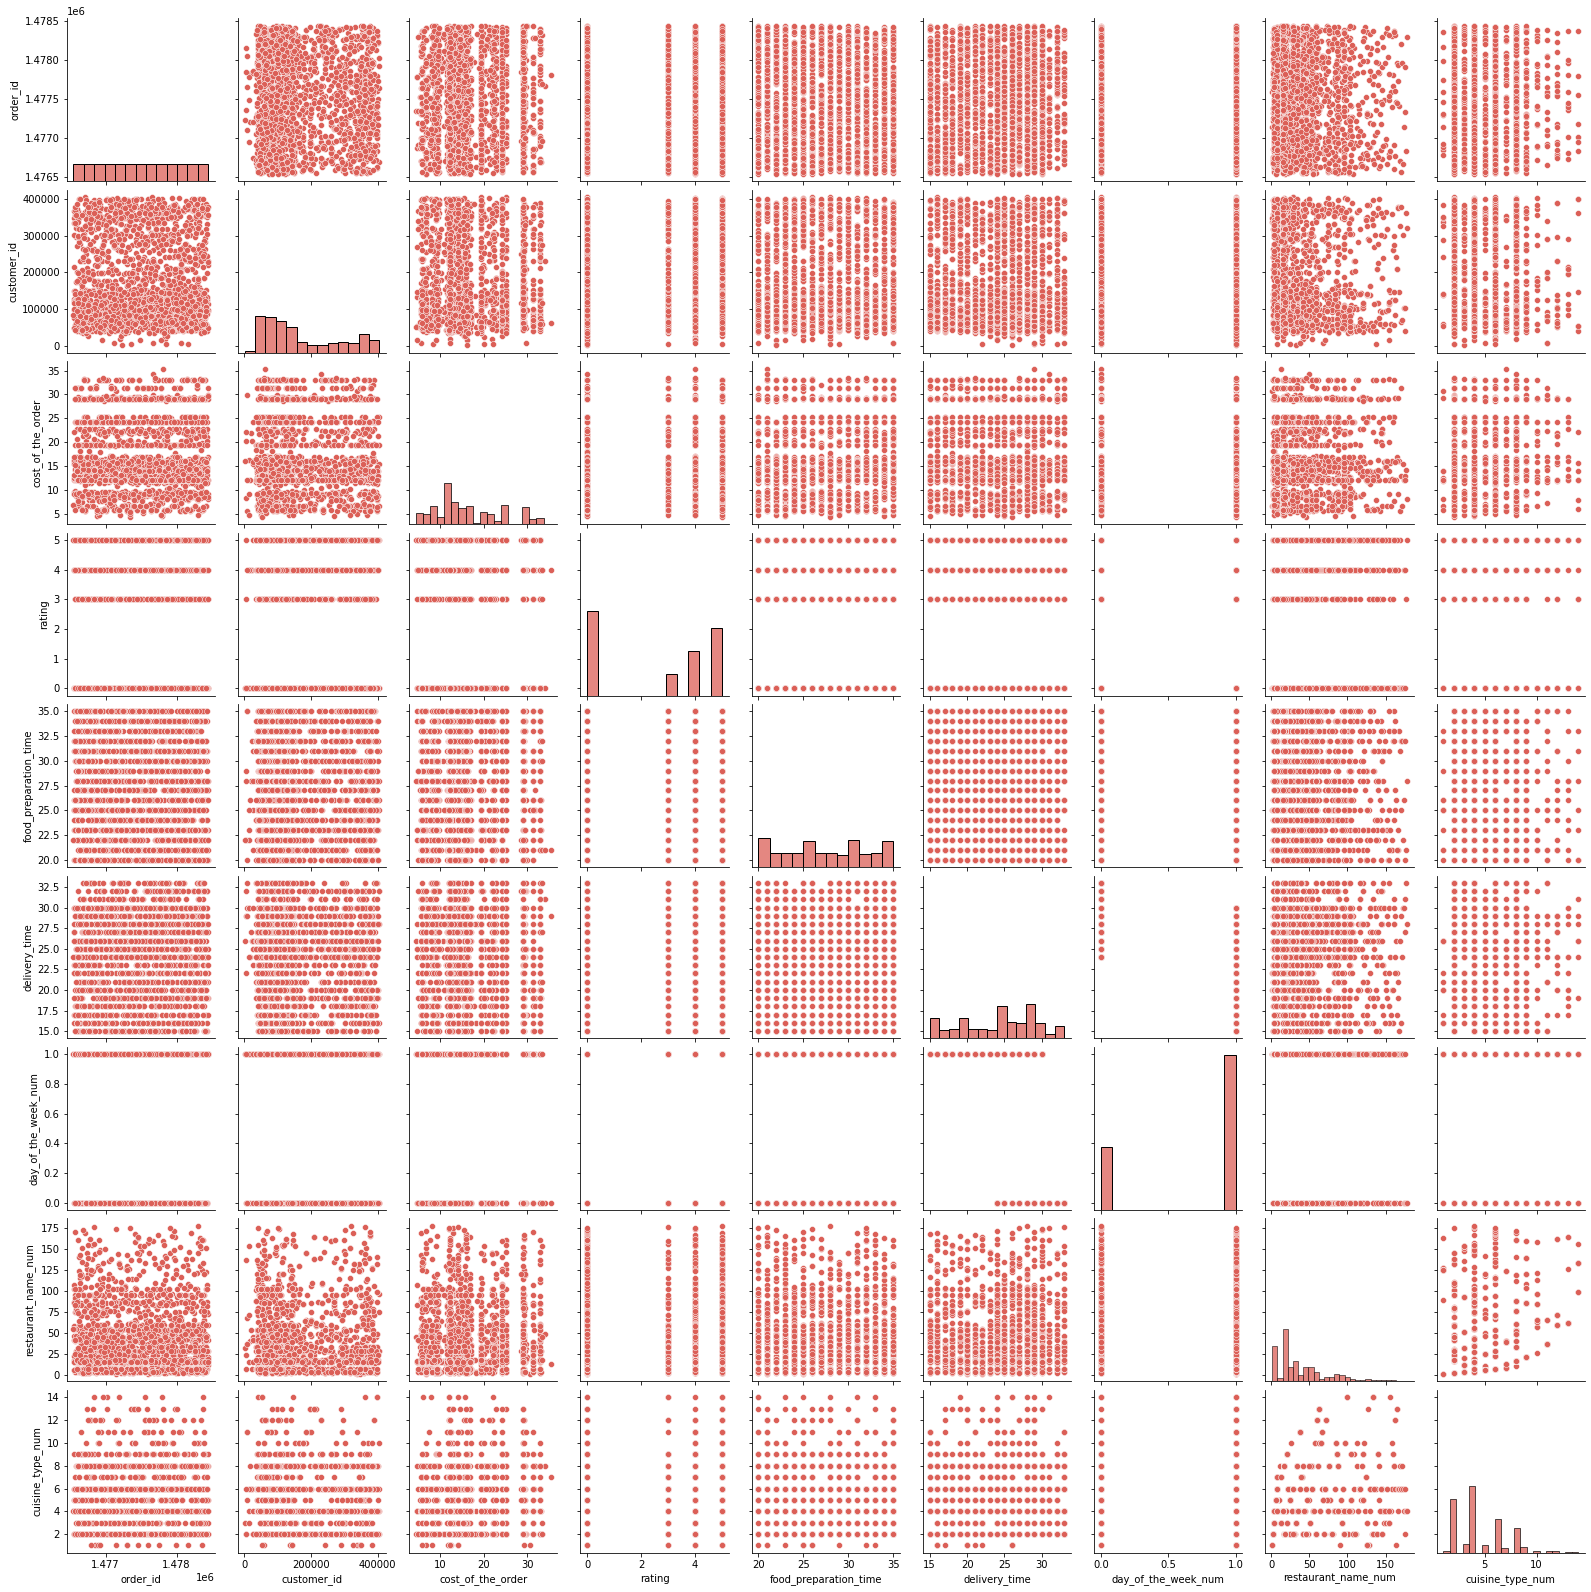

In [ ]:
sns.set_palette("hls")
sns.pairplot(data = df[['order_id', 'customer_id', 'cost_of_the_order','rating', 'food_preparation_time', 'delivery_time', 'day_of_the_week_num', 'restaurant_name_num', 'cuisine_type_num']])


#### Observations
No explicit patterns of significance be observed here.

 ##### **Food_Preparation_Time Detail Analysis with other features**




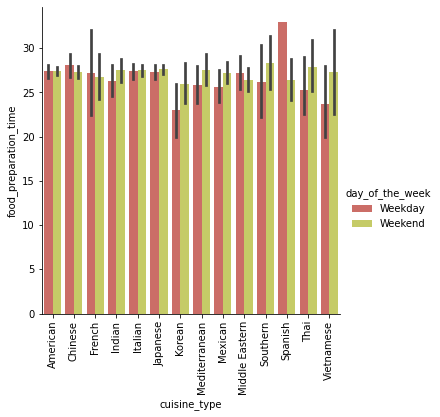

In [ ]:
# Average food preparation time by cuisine and day of the week
sns.catplot(x='cuisine_type', y='food_preparation_time', data=df_orig, kind="bar", hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations:
We can see here that the **average food preparation time in most cases is higher on the weekends**, which is understandable as there are more orders then but **spanish cuisine restaurants take the longest to prepare on the weekdays** which is something that could be highligted to the restaurant so they can improve there.

 ##### **Popular Restaurant vs other features**

<Figure size 1080x288 with 0 Axes>

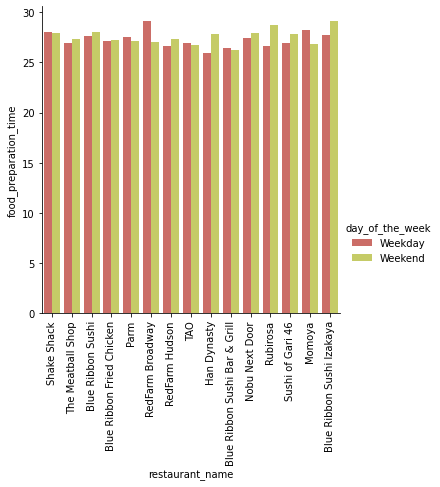

In [ ]:
# Average food preparation time by top 15 restaurant and day of the week
plt.figure(figsize = (15,4))
sns.catplot(x='restaurant_name', y='food_preparation_time', data=df, kind="bar", hue='day_of_the_week', order=df_orig['restaurant_name'].value_counts(ascending=False)[:15].index, ci=None)
plt.xticks(rotation=90)
plt.show()

#### Observations:
These are the preperation times of the top 15 restaurants and almost most of them except a few **have a longer prep time on weekends** which we had predicted already which is because of the higher number of orders on weekends
**RedFarm Broadway and Momoya are the only ones which have a higher food prep time on weekdays**; is it because they have more orders on weekdays? 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

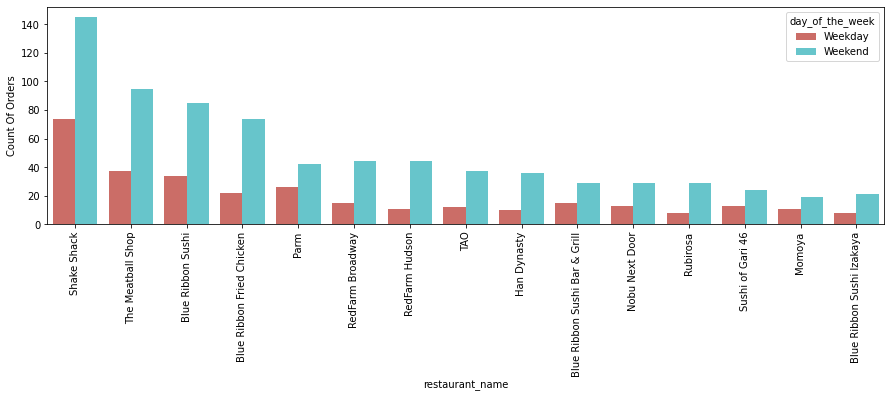

In [ ]:
# Looking at total orders for the top 15 restaurants grouped by day of the week
plt.figure(figsize = (15,4))
sns.countplot(data = df, x = 'restaurant_name',
            order = df.restaurant_name.value_counts().iloc[:15].index, hue='day_of_the_week', palette="hls")
plt.ylabel('Count Of Orders')
plt.xticks(rotation=90)

#### Observations:
* Looking at **RedFarm Broadwa**y & **Momoya** they **both have more orders on the weekend**, so the intuition we had above is not valid and this could be because of other reasons like lesser staff on weekdays etc. 
* This feedback should be given to the restaurant so they can improve their weekday food prep time?


##### **Cost of the order vs other features**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

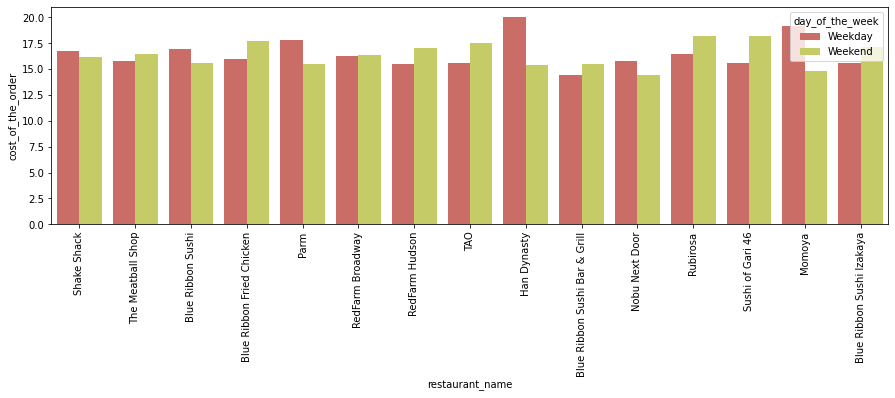

In [ ]:
# Cost of the order grouped by restaurant name and day of the week
plt.figure(figsize = (15,4))
sns.barplot(data = df_orig, x = 'restaurant_name', y = 'cost_of_the_order',
            order = df_orig.restaurant_name.value_counts().iloc[:15].index, hue='day_of_the_week', ci = None)
plt.xticks(rotation=90)

#### Observations:
* Looking at the average cost of the orders by restaurants, some restaurants have **higher average cost per order on weedays like 'Pam' & 'Han Dynasty'** but these could be outliers, we should look in detail at the average cost across all restaurants.

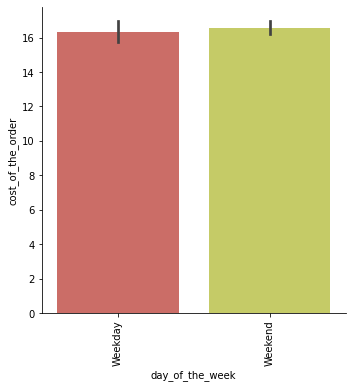

In [ ]:
# Average cost_of_the_order and day of the week
sns.catplot(x='day_of_the_week', y='cost_of_the_order', data=df_orig, kind="bar")
plt.xticks(rotation=90)
plt.show()

#### Observations:
We can see here that the **average costs of the orders is almost the same both on weekdays and weekends**, so the trend observed above could be just for some restaurants.

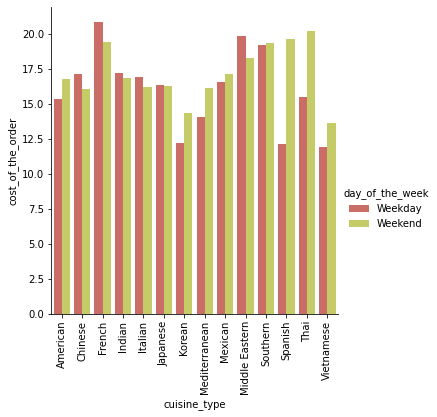

In [ ]:
# Average cost_of_the_order by cuisine_type and day of the week
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=df_orig, kind="bar", hue='day_of_the_week', ci=None)
plt.xticks(rotation=90)
plt.show()

#### Observations:
* We can see here that the **average cost of orders is highest for French cuisine on Weekday** and **Thai in weekend**.
* In general French Cuisine has the highest average order cost.
* And the **least popular on both Weekdays & Weekends are the Viatnamese cuisine**, so this info could be shared with this cuisine restaurents so they can think about improving this via advertising or giving offers?
* **Spanish & Thai cuisine is quite popular or weekends but not so much on weekdays**, so they can also be given this feedback so they also use techniques like mentioned above to impove weekday sales?

##### **Ratings vs other features**

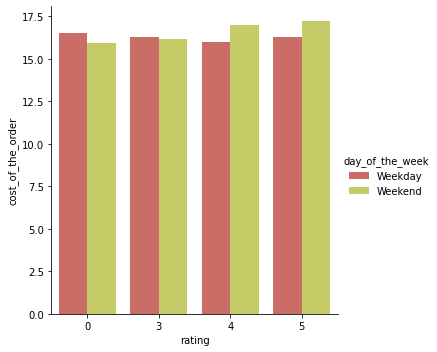

In [ ]:
# Average cost of the orders by ratings and day of the week
sns.catplot(x='rating', y='cost_of_the_order', data=df_orig, kind="bar", hue='day_of_the_week', ci=None)

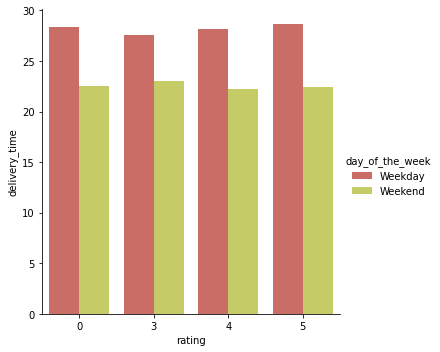

In [ ]:
sns.catplot(x='rating', y='delivery_time', data=df_orig, kind="bar", hue='day_of_the_week', ci=None)

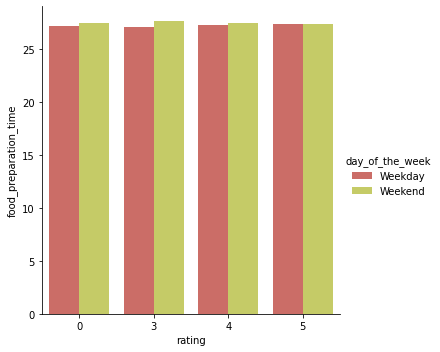

In [ ]:
sns.catplot(x='rating', y='food_preparation_time', data=df_orig, kind="bar", hue='day_of_the_week', ci=None)

#### Observations:

* Orders that have the different ratings including 'Not Given' have an average cost of $15 but the **average cost of the 5 and 4 star rating being higher**.
* For the not given ratings the weekday average cost per order is high, maybe the people are too busy to leave ratings during the weekday. 
* The app could force customers to rate their experience.
* There is no explicit relation between the cost of the orders, delivery time and food_preparation time and the ratings received that we can see here

**Cuisine Type vs other features**

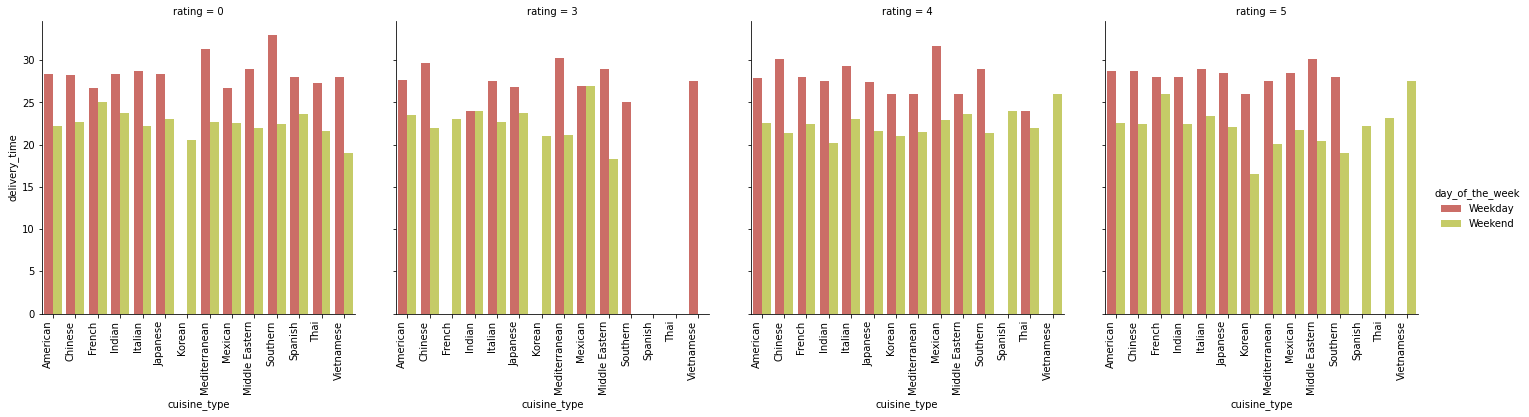

In [ ]:
# Average delivery time by cuisine and day of the week
ax = sns.catplot(x='cuisine_type', y='delivery_time', data=df_orig, kind="bar", hue='day_of_the_week', ci=None, col='rating')
for axes in ax.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), 
                         rotation=90, 
                         horizontalalignment='right')
plt.show()

* **Vietnamese Cuisine** restaurants have **no 5 & 4 star ratings on weekdays** but they do on weekends; so food is liked by people by **needs to be promoted on weekdays** as it also has very few orders both on weekdays and weekends?
* Though Korean cuisine is one of the least popular cuisine its ratings are very impressive with **no missing ratings on a Weekday**
* Again we see here that **many cuisines are missing rating on Weekdays**, which in line with our observation before.
* Here we can see the delivery times are high for weekdays, so we need to work on improving this? 

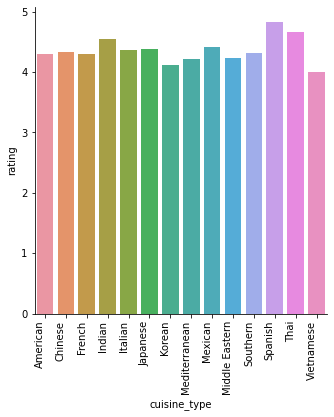

In [ ]:
# Average rating by cuisine ignoring the 'Not Given' ratings
ax = sns.catplot(x='cuisine_type', y='rating', data=df[(df.rating != 0)], kind="bar", ci=None,)
for axes in ax.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), 
                         rotation=90, 
                         horizontalalignment='right')
plt.show()

* **Spanish cuisine** and the **Thai cuisine** have higher ratings when compared to the popular cuisines like American and Japanese (when not given ratings are excluded)

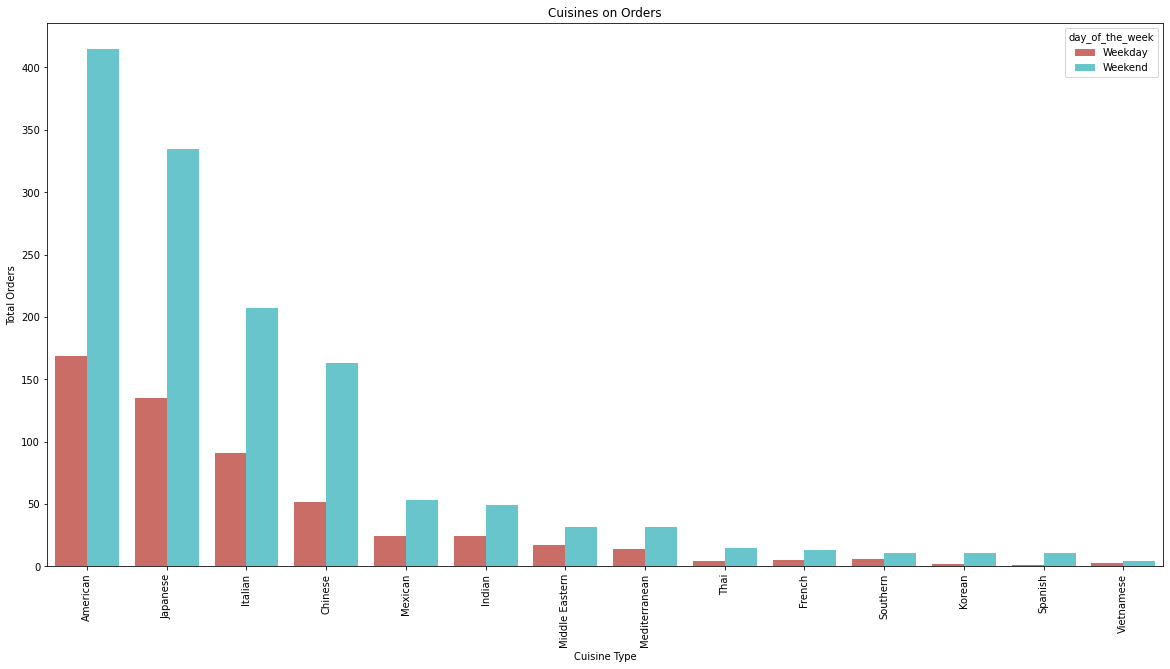

In [ ]:
# weekend_cuisine = df.loc[df['day_of_the_week'] == 'Weekend']
plt.figure(figsize = (20,10))
ax = sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week', palette='hls', order=df['cuisine_type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Cuisines on Orders')
ax.set_xlabel('Cuisine Type')
ax.set_ylabel('Total Orders')
plt.show()

**All cuisines** have **higher weekend orders** and though Spanish and Thai cuisine have higher average ratings the total orders is very low.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Rating count more than 50
# Method 1:
# Remove restaurants with missing data i.e. not given as this can bring down a restaurants average
df_clean = df.loc[df['rating']!=0]
rest_for_promo = df_clean.groupby('restaurant_name', as_index=False)['rating'].apply(lambda x: x.count() > 50 and x.mean() > 4).rename(columns={'rating':'eligibility'})
print(f"Restaurants eleigible for the promo: {list(rest_for_promo[rest_for_promo['eligibility']==True]['restaurant_name'])}")

Restaurants eleigible for the promo: ['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


#### Observations:
1. `Blue Ribbon Fried Chicken`
2. `Blue Ribbon Sushi` 
3. `Shake Shack` 
4. `The Meatball Shop`
<p>are the four restaurants eligible for the promotional offer in the advertisement of the restaurants.

In [ ]:
'''
# Method 2 to cross check
rest_for_promo2 = df_clean.groupby('restaurant_name', as_index=False)['rating'].agg(['count', 'mean']).rename(columns={'count':'rating_count', 'mean':'average_rating'})
filt_rest = list(rest_for_promo2.loc[(rest_for_promo2['rating_count'] > 50) & (rest_for_promo2['average_rating'] > 4)].reset_index()['restaurant_name'])
print(filt_rest)
'''

"\n# Method 2 to cross check\nrest_for_promo2 = df_clean.groupby('restaurant_name', as_index=False)['rating'].agg(['count', 'mean']).rename(columns={'count':'rating_count', 'mean':'average_rating'})\nfilt_rest = list(rest_for_promo2.loc[(rest_for_promo2['rating_count'] > 50) & (rest_for_promo2['average_rating'] > 4)].reset_index()['restaurant_name'])\nprint(filt_rest)\n"

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Net Revenue
over_20_orders = df.loc[(df['cost_of_the_order'] > 20), 'cost_of_the_order'].apply(lambda x: .25 * x).sum()
# print(over_20_orders)
over_5_orders = df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].apply(lambda x: .15 * x).sum()
# print(over_5_orders)
total_revenue = over_20_orders + over_5_orders
print(f'Net Revenue: ${total_revenue:.2f}')

Net Revenue: $6166.30


#### Observations:
As can be seen the net revenue is **\$6166.30**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Write the code here
df_del_60 = df.loc[(df['food_preparation_time'] + df['delivery_time']) > 60]
print(len(df_del_60))
delayed_deli = (len(df_del_60)/len(df))*100
print(f'Percentage of orders taking more than 60 mins: {delayed_deli:.2f}%')

200
Percentage of orders taking more than 60 mins: 10.54%


#### Observations:
Only 11% of the orders take more than 60 mins to prepare and deliver. Which is not very high.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Mean delivery times weekdays vs weekends
weekday_mean_deli = df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
print(f'Mean delivery time during the weekday is: {weekday_mean_deli:.2f} mins')
weekend_mean_deli = df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()
print(f'Mean delivery time during the weekdend is: {weekend_mean_deli:.2f} mins')


Mean delivery time during the weekday is: 28.34 mins
Mean delivery time during the weekdend is: 22.47 mins


#### Observations:
The mean delivery time is lower on weekends and that is good considering higher traffic on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:
1. The average orders per cutomer is around 2 orders
2. The most popular time to order is the weekend
3. The most times when a rating is not given for an order is on a weekday, which could be because of two reasons
  * weekdays are busier for people 
  * The delivery time of orders is higer on weekdays (as observed from the average delivery time weekday vs weekends)
4. Food preperation time has been consistent both on weekdays and weekends and across different cuisines.
5. Higher rated foods have a higher average order cost.
6. Delivery times are better on weekends which co-relate to the traffic on weekends. 

### Recommendations:
* The issue mentioned in the 3rd conclusion point above could be addressed by forcing the customer to give a rating for their previous order before allowing them to place a new order. Or by reminding them on a weekend to give a rating since many customers have placed only one order. Incentives such as minor discounts can also be given which would encourage to provide ratings and also increase the number of repeat customers. 
* Lower dollar value orders i.e. \$12-\$14 is the most popular, and \$25-\$35 is the least popular range; therefore promotions could be given for this range encouraging people to order more. Like free delivery / free item for orders over \$20, 10% off for orders over \$25 etc.
* The not so popular restaurants can be promoted via promotions during the weekend as thats the most popular time for odering food. 
* The Vietnamese Cuisine, is the least popular cuisine, followed by Spanish & Korean. Also, Vietnamese cuisine with no 4 &  5 star ratings on a weekday which implies that their service or quality of food needs to be improved during weekdays. 
* Though Korean cuisine is one of the least popular cuisine its ratings are very impressive with no missing and 3 star ratings on a Weekday; indicating people are happy with the order, so this cuisine if promoted could get popular.
* American cuisine is the most popular cuisine, followed by Japanese and Italian but **French cuisine has the highest average cost per order** thus making it the pricey cuisine. So promoting this cuisine can bring in more revenue as currently its popularity is not very high.
* Spanish & Thai cuisine has the highest average rating so this cuisine could also gain popularity if promoted as currently it has fewer orders.
* Restaurants like RedFarm Brodway and Momoya have higher average food prep time on Weekdays even though they don't have many orders, this should be looked into and shared with the restaurants so they can improve their service.



---